# Create Random Data for Testing
* `random_series`: Returns a series of random data of several types, including names, random walks with perlin-noise and errorprone series to test your functions.
* `decorate`: Decorates a series with specials (e.g. NaNs)
* `people` and `random_numbers`: Random data for testing.

In [1]:
# blab init
try:
    import blab
except ImportError as e:
    !pip install blab
    import blab    
startup_notebook = blab.blab_startup()
%run $startup_notebook 

In [3]:
import numpy      as np
import pandas     as pd 
import bpyth      as bpy
import random

# pandasklar
try:
    import pandasklar as pak 
except ImportError as e:
    !pip install pandasklar
    import pandasklar as pak   
    
# verbose
#pak.Config.set('VERBOSE', True)

VERBOSE = True
--> setting verbose=True as default for all pandasklar functions

time: 10.8 s


## random_series()

In [32]:
?pak.random_series

time: 27.7 ms (started: 2022-10-31 18:24:43 +01:00)


Signature: pak.random_series(size, typ, **kwargs)
Docstring:
Returns a series of random data. 
* size
* typ: 'int', 'float', 'string', 'name', 'choice', 'list', 'mix',
       'ascending', 'descending', 'perlin' or 'errorprone'. Or the first letter of this.
       'name' generates random first names, 'list' generates lists of random first names.
       'mix' generates mixed datatypes. 
       'ascending', 'descending' and 'perlin' generates ordered random sequences.
       'errorprone' generates sequences of NaNs, 0, 1 with similar index. Useful for testing. 

The other arguments are passed to the appropriate functions for the type of random data.
General arguments are:
* name
* p_nan: value 0..1 specifies  how many NaNs are interspersed
* p_dup: value 0..1 determines how many Dups are included.

There are extra parameters for some types of random data:
- int:    min, max: closed interval, min and max are both possible values in the generated data
- float:  decimals: how many decimal pl

### Simple

In [33]:
# i f s n c means int float string name choice
size = 100
i = pak.random_series( size, 'i')
f = pak.random_series( size, 'f')
s = pak.random_series( size, 's')
n = pak.random_series( size, 'n')
c = pak.random_series( size, 'c')
pak.dataframe( (i, f, s, n, c) )

,rnd_int,rnd_float,rnd_string,rnd_name,rnd_choice
0,798,0.318,üUuyeoV,Alexandra,b
1,213,0.640,rFöä1mi,Tom,d
2,748,0.268,wSüUKQp,Fiona,a
3,768,0.092,aOhDx,Daniel,c
4,948,0.145,O9qg,Nora,e
...,...,...,...,...,...
95,848,0.229,Äilzä,Gerhard,e
96,723,0.954,OlJT,Sandra,e
97,176,0.184,Üqek,Marvin,c
98,486,0.161,sÖZNEp,Pia,e


time: 60.9 ms (started: 2022-10-31 18:24:43 +01:00)


### Random Numbers

In [34]:
# Several types of random numbers, with parameters
size = 100
i = pak.random_series( size, 'int',        min=-5, max=5,     p_nan=0.1,   p_dup=0    )
f = pak.random_series( size, 'float',      decimals=4,        p_nan=0.1,   p_dup=0    )                       
a = pak.random_series( size, 'ascending'                                              )
d = pak.random_series( size, 'descending'                                             )
p = pak.random_series( size, 'perlin',     freq=[2,1,8,1],                            )

# decorate f with 50% 0-values  
f = f.apply(pak.decorate, special=0, p=0.5)  

df = pak.dataframe( (i,f,a,d,p) )
pak.sample(df)

,rnd_int,rnd_float,rnd_ascending,rnd_descending,rnd_perlin
0,-2,0.7561,0,1.000000,0.000000
1,-1,0.0000,0,0.999198,0.061065
25,3,0.4452,0,0.910395,0.977609
44,3,0.4726,0,0.845606,0.538553
46,-2,0.1273,0,0.844481,0.550873
98,-3,0.0000,0,0.000990,0.127714
99,3,0.5039,0,0.000000,0.063707


time: 98 ms (started: 2022-10-31 18:24:43 +01:00)


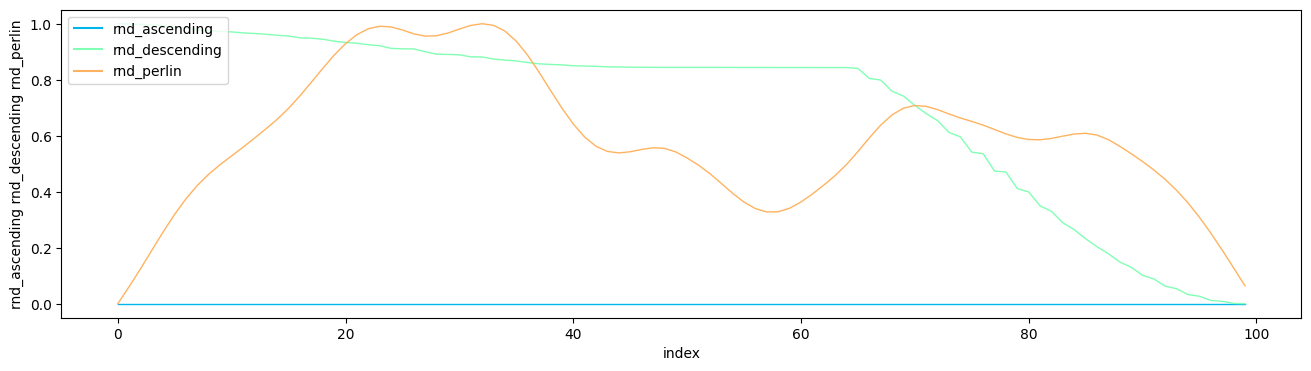

time: 2.85 s (started: 2022-10-31 18:24:44 +01:00)


In [35]:
# ascending, descending and perlin are ordered random sequences
%matplotlib inline
spalten = ['rnd_ascending','rnd_descending','rnd_perlin',]
pak.plot(df[spalten])

In [36]:
#pak.analyse_cols(df)

time: 29.8 ms (started: 2022-10-31 18:24:46 +01:00)


### Strings, names, lists and other types

In [37]:
# Strings, names, lists and other types, with parameters
size = 100
s = pak.random_series( size, 'string', len_min=2, len_max=20,           p_nan=0.2,   p_dup=0    )
n = pak.random_series( size, 'name',                                    p_nan=0.2,   p_dup=0.33 )
c = pak.random_series( size, 'choice', choice=['Bremen','Bremerhaven'], p_nan=0.3,   p_dup=0,    name='rnd_city')
l = pak.random_series( size, 'list',                                    p_nan=0.3,   p_dup=0.5  )
m = pak.random_series( size, 'mix',                                     p_nan=0.1,   p_dup=0    )
df = pak.dataframe( (s, n, c, l, m) )
pak.sample(df)

,rnd_string,rnd_name,rnd_city,rnd_list,rnd_mix
0,dN8KTSmb,<NA>,NaN,"[Anette, Klara, Erik, Mathias, Christian, Anja...",{0}
1,<NA>,<NA>,NaN,NaN,0.5277
30,cayqbHFöDKLFLRäzcwe,Stella,Bremen,"[Elena, Silvia, Anna, Jakob]",0.4048
38,zK,Bernhard,Bremerhaven,"[Konstantin, Tanja, Manfred, Tom, Tom, Dominic]",0.8079
48,eUQZüdInÜ,Anja,Bremen,"[Mike, Anja, Petra, Konstantin]",W21E5p1SQi
98,JXu0EtdDT3aLÜnfeÄa,<NA>,Bremerhaven,"[Sonja, Louise, Tom, Anna]",-43059
99,<NA>,Anna,Bremerhaven,"[Anna, Tom, Lina, Rainer, Barbara]","[Horst, Hannah, Jonathan]"


time: 144 ms (started: 2022-10-31 18:24:47 +01:00)


### Random progressions
Random progressions are `random_series` with typ `'ascending'`, `'descending'` or `'perlin'`.

In [38]:
# Some random progressions
size = 100
a = pak.random_series( size, random.choice([ 'a','d','p']))
b = pak.random_series( size, random.choice([ 'a','d','p']))
c = pak.random_series( size, random.choice([ 'a','d','p']))
d = pak.random_series( size, random.choice([ 'a','d','p']))
e = pak.random_series( size, random.choice([ 'a','d','p']))
f = pak.random_series( size, random.choice([ 'a','d','p']))
g = pak.random_series( size, random.choice([ 'a','d','p']))
h = pak.random_series( size, random.choice([ 'a','d','p']))
i = pak.random_series( size, random.choice([ 'a','d','p']))
j = pak.random_series( size, random.choice([ 'a','d','p']))
df = pak.dataframe( (a,b,c,d,e,f,g,h,i,j) )
df.head(3)

,A,B,C,D,E,F,G,H,I,J
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,0.998064,0.004595,0.004651,0.000349,0.012602,0.002803,0.063756,0.008172,0.998992,0.002844
2,0.990968,0.012695,0.016156,0.009385,0.017143,0.011401,0.167431,0.013965,0.983847,0.014499


time: 184 ms (started: 2022-10-31 18:24:47 +01:00)


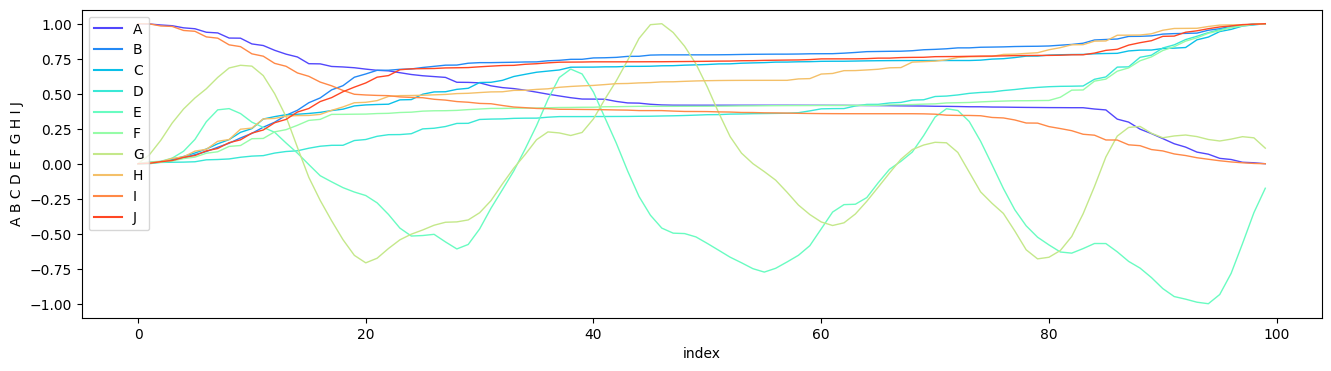

time: 5.96 s (started: 2022-10-31 18:24:47 +01:00)


In [39]:
%matplotlib inline
pak.plot(df)

### Random Scaling 
* use scale(), see "Scale Numbers"

min = 0.767805819167236
max = 1.0432012836320148


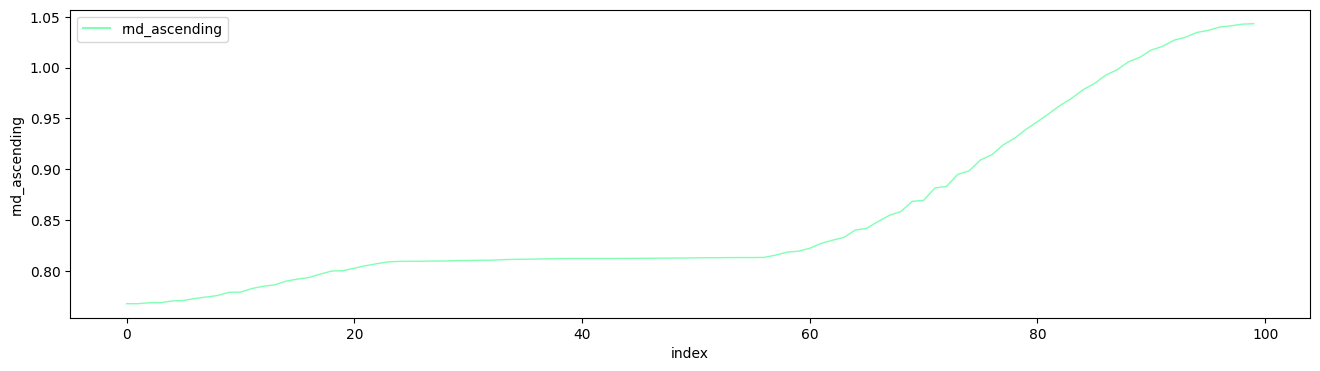

time: 2.06 s (started: 2022-10-31 18:24:53 +01:00)


In [40]:
s = pak.random_series(100, 'a') 
s = pak.scale(s, 'random')   

print(  'min =', s.min() )
print(  'max =', s.max() )

%matplotlib inline
pak.plot(s)

### Random Error-prone Series
'errorprone' generates sequences of NaNs, 0, 1 with similar index.
Useful for testing. 

In [41]:
# try this sereral times
pak.random_series( 7, 'errorprone')  

42    1
42    1
42    1
42    1
42    1
42    1
42    1
Name: rnd_errorprone_1i9, dtype: int64

time: 34.5 ms (started: 2022-10-31 18:24:55 +01:00)


## random_perlin()
You can access random perlin noise by the function `random_series` with `typ='perlin'`
of by the function `random_perlin`.

In [42]:
?pak.random_perlin

time: 34.2 ms (started: 2022-10-31 18:24:55 +01:00)


Signature: pak.random_perlin(shape=(100, 5), freq=[3, 6, 12, 24], op='add')
Docstring:
Returns a Dataframe with Perlin Noise:
- Every column looks like a random walk.
- The columns correlate (the noise is 2-dim)
* shape: The shape of the result
* freq:  Up to 4 frequencies for the random walk.
         The frequencies are added or multipied with descending factors 1, 1/2, 1/4 and 1/16.
         A frequency of 1 means 1 maximum and 1 minimum.
         A frequency of 2 means 2 maxima  and 2 minima.                
         A frequency of 0 means, that nothing is added for the corresponding factor.
         E.g. freq=[1,0,0,100] gives a very low-frequency random walk 
         with a very slight admixture of high-frequency components. 
* op:    'add' or 'mult', how the frequencies are linked together
            
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/content.py
Type:      function


In [43]:
# default perlin
df = pak.random_perlin( shape=(100,15) )
df.head(5)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,0.000000,0.285832,0.055897,0.087310,-0.022165,0.000000,0.053539,-0.013396,-0.009595,-0.052575,0.000000,-0.057225,-0.052379,0.145146,-0.028896
1,-0.046584,0.263855,0.052091,0.084575,0.015141,0.039045,0.030269,-0.015874,0.017314,-0.044905,-0.013671,-0.058015,-0.063959,0.129114,-0.016030
2,-0.085985,0.241970,0.045318,0.070434,0.055812,0.080060,0.004165,-0.010625,0.038679,-0.034432,-0.015762,-0.064216,-0.090370,0.082301,-0.008347
3,-0.098639,0.221421,0.043618,0.062853,0.087785,0.110219,-0.006457,0.003151,0.055408,-0.017158,-0.008959,-0.080196,-0.107508,0.019828,-0.016683
4,-0.096542,0.202502,0.057397,0.067413,0.107860,0.123784,0.003668,0.021323,0.081116,0.002703,0.003078,-0.088631,-0.090547,-0.036331,-0.042616


time: 210 ms (started: 2022-10-31 18:24:55 +01:00)


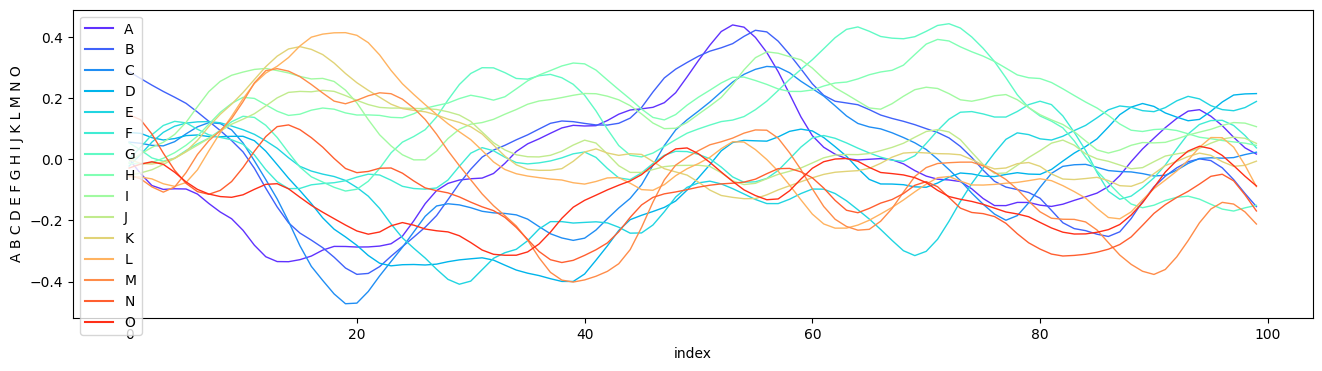

time: 7.54 s (started: 2022-10-31 18:24:55 +01:00)


In [44]:
%matplotlib inline
pak.plot(df)

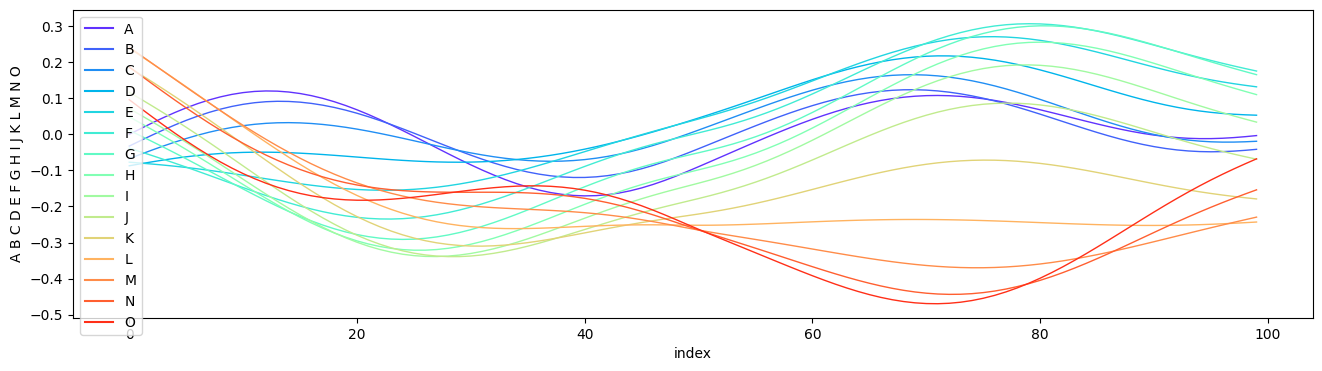

time: 8.05 s (started: 2022-10-31 18:25:03 +01:00)


In [45]:
# freq 2 means: 2 minima and 2 maxima
df = pak.random_perlin( shape=(100,15), freq=2 )
pak.plot(df)

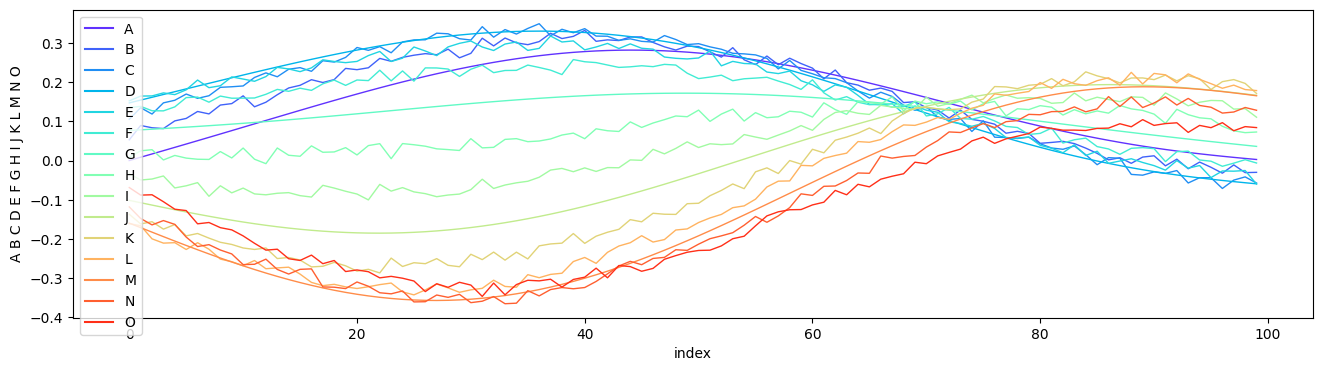

time: 7.83 s (started: 2022-10-31 18:25:11 +01:00)


In [46]:
# freq 1 added to a little bit freq 100
df = pak.random_perlin( shape=(100,15), freq=[1,0,0,100] )
pak.plot(df, x='index')

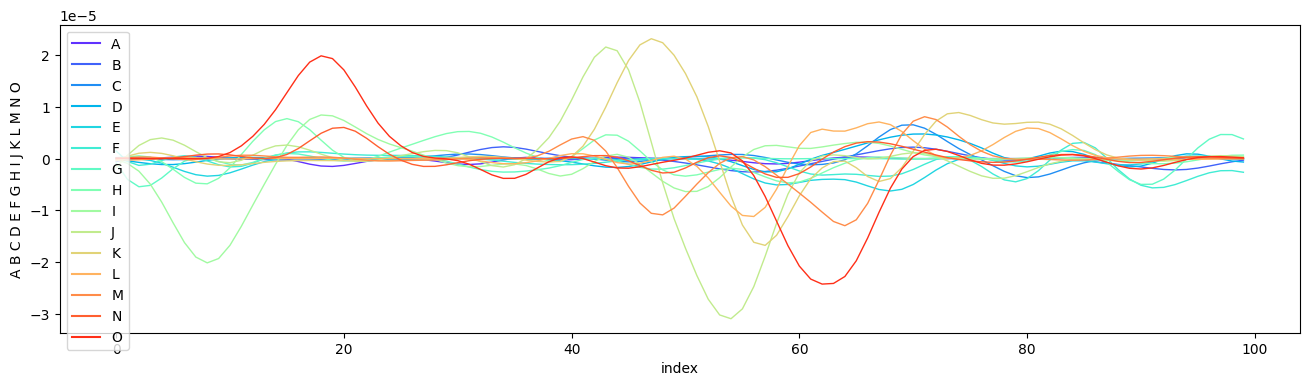

time: 7.5 s (started: 2022-10-31 18:25:19 +01:00)


In [47]:
df = pak.random_perlin( shape=(100,15), freq=[1,1,4,8], op='mult')
pak.plot(df, x='index')

## decorate()

In [48]:
?pak.decorate

time: 36.4 ms (started: 2022-10-31 18:25:26 +01:00)


Signature: pak.decorate(skalar, p=0.2, special=nan)
Docstring:
Decorates a series with specials (e.g. NaNs), is applied with apply
e.g. result = result.apply(decorate, p=0.1)               # decorate with 10% nan  
e.g. result = result.apply(decorate, p=0.1, special='a')  # decorate with 10% 'a'.              
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/content.py
Type:      function


In [49]:
df = pak.dataframe( [ list('Babykorb'), 
                      list('abfällig'), 
                      list('Abgründe'), 
                      list('Kätzchen'), 
                      list('Landwirt'), 
                      list('lebendig'), 
                      list('Saugrohr'),       
                      list('Trugbild'),                     
                ] )
df['B'] = df.B.apply( pak.decorate, p=0.2, special='😀')
df['H'] = df.H.apply( pak.decorate, p=0.2)
df

,A,B,C,D,E,F,G,H
0,B,a,b,y,k,o,r,b
1,a,b,f,ä,l,l,i,g
2,A,b,g,r,ü,n,d,e
3,K,ä,t,z,c,h,e,n
4,L,a,n,d,w,i,r,NaN
5,l,😀,b,e,n,d,i,NaN
6,S,a,u,g,r,o,h,NaN
7,T,r,u,g,b,i,l,d


time: 74.7 ms (started: 2022-10-31 18:25:26 +01:00)


## people(): Easy Random Data

In [50]:
?pak.people

time: 36.4 ms (started: 2022-10-31 18:25:26 +01:00)


Signature: pak.people(size=100)
Docstring: Returns a DataFrame with random data for testing purposes 
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/content.py
Type:      function


In [51]:
# Test data
df = pak.people()
pak.sample(df)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Annika,34,30,65011,Berlin,X2H06,"{3, q, k, I, U}","[A, B, C]"
1,Tom,38,30,<NA>,<NA>,V1äEuoxIP,"{4, 0, K}","[A, B, C, C]"
19,Silvia,29,20,58261,Bremen,yjjtÄbCL,{N},"[c, b, a]"
39,Anna,26,20,14858,Berlin,SoANx3oM,"{M, c, a, i}",[]
40,Arne,32,30,11314,Berlin,6aVöP,"{q, D, L, O, C}","[A, C, C, B]"
98,Karsten,23,20,57246,<NA>,5yhiö,"{D, V, L, p}","[A, A, A]"
99,Larissa,28,20,28135,Berlin,zJ9YO6Gqüö,"{q, D, L, O, C}","[A, B, C, C]"


time: 117 ms (started: 2022-10-31 18:25:26 +01:00)


In [52]:
pak.analyse_cols(df)

,col_name,datatype_instance,datatype,datatype_short,datatype_suggest,is_numeric,is_string,is_hashable,nan_allowed,mem_usage,ntypes,nunique,nnan,ndups,n,vmin,vmean,vmedian,vmax,vsum
0,__index__,int64,np.int64,int64,np.int8,True,False,True,False,800.0 B,1,100,0,0,100,0.0,49.50,49.5,99.0,4950.0
1,first_name,str,pd.string,string,,False,True,True,True,6.2 KB,1,70,0,30,100,Andreas,NaN,NaN,Yannic,NaN
2,age,int8,pd.Int8,Int8,,True,False,True,True,200.0 B,1,21,0,79,100,20.0,31.29,31.0,42.0,3129.0
3,age_class,int8,pd.Int8,Int8,,True,False,True,True,200.0 B,1,3,0,97,100,20.0,26.50,30.0,40.0,2650.0
4,postal_code,int32,pd.Int32,Int32,,True,False,True,True,500.0 B,1,67,5,28,100,10665.0,61872.91,65011.0,99883.0,5877926.0
5,birthplace,str,pd.string,string,,False,True,True,True,5.5 KB,1,2,31,67,100,Berlin,NaN,NaN,Bremen,NaN
6,secret,str,pd.string,string,,False,True,True,True,8.1 KB,1,100,0,0,100,3dvXÜSfC7g,NaN,NaN,öu8e2CVee,NaN
7,features,set,object,object,,False,True,False,True,30.8 KB,1,80,0,20,100,{},NaN,NaN,"{q, D, L, O, C}",NaN
8,history,list,object,object,,False,True,False,True,7.0 KB,1,9,0,91,100,[],NaN,NaN,"[c, b, a]",NaN


time: 70.5 ms (started: 2022-10-31 18:25:26 +01:00)


## random_numbers()

In [53]:
?pak.random_numbers

time: 31.6 ms (started: 2022-10-31 18:25:27 +01:00)


Signature: pak.random_numbers(size=1000)
Docstring: Returns a DataFrame with random data for testing purposes 
File:      /media/me/DATA/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/content.py
Type:      function


In [54]:
# Test data
df = pak.random_numbers()
pak.sample(df)

,A,B,C,D,E
0,32,36229,0.882,3.59,0.000000
1,33,34247,0.907,2.83,0.000033
749,29,46514,0.525,4.25,0.455891
770,27,10594,0.089,4.85,0.504599
859,33,10972,0.010,7.73,0.753237
998,29,12550,0.189,3.80,0.999950
999,27,66625,0.000,9.07,1.000000


time: 182 ms (started: 2022-10-31 18:25:27 +01:00)


In [55]:
pak.analyse_cols(df)

,col_name,datatype_instance,datatype,datatype_short,datatype_suggest,is_numeric,is_string,is_hashable,nan_allowed,mem_usage,ntypes,nunique,nnan,ndups,n,vmin,vmean,vmedian,vmax,vsum
0,__index__,int64,np.int64,int64,np.int16,True,False,True,False,7.8 KB,1,1000,0,0,1000,0.0,499.50,499.50,999.00,499500.00
1,A,int8,pd.Int8,Int8,,True,False,True,True,2.0 KB,1,23,0,977,1000,20.0,31.02,31.00,42.00,31021.00
2,B,int32,pd.Int32,Int32,,True,False,True,True,4.9 KB,1,700,0,300,1000,10268.0,53792.96,53177.00,99906.00,53792955.00
3,C,float32,np.float32,float32,,True,False,True,True,3.9 KB,1,700,0,300,1000,0.0,0.49,0.50,1.00,494.45
4,D,float32,np.float32,float32,,True,False,True,True,3.9 KB,1,700,0,300,1000,0.0,4.82,4.81,9.99,4815.40
5,E,float32,np.float32,float32,,True,False,True,True,3.9 KB,1,993,0,7,1000,0.0,0.43,0.42,1.00,431.67


time: 76 ms (started: 2022-10-31 18:25:27 +01:00)


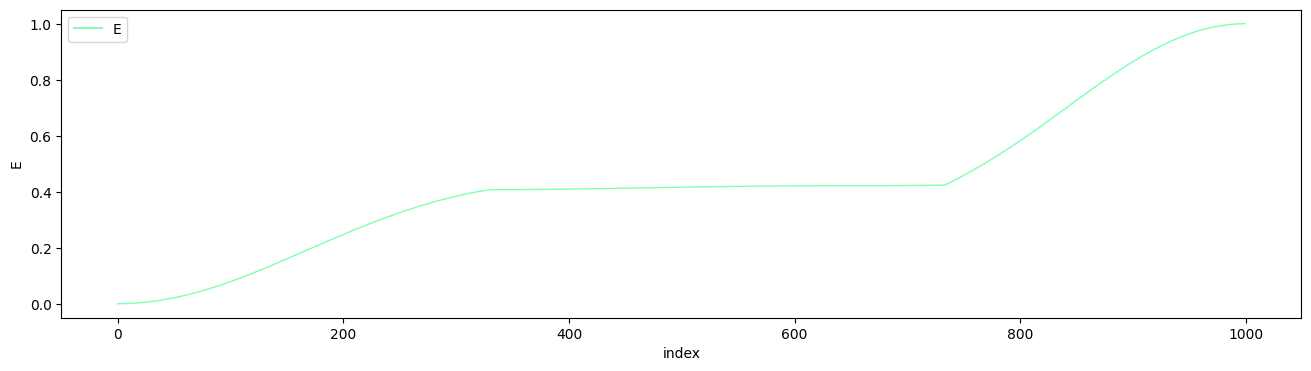

time: 1.92 s (started: 2022-10-31 18:25:27 +01:00)


In [56]:
pak.plot(df.E)